# RDKit

- cheminformatics를 위한 라이브러리
 - (2000~) Rational Discovery for building predictive models for ADME, Tox, biological activity
- 분자표현법, 분자특성 보기 등을 제공: mol 파일, SMILES, SDF 등
- [RDKit Tutorial](https://www.rdkit.org/docs/GettingStartedInPython.html)

# import

## DeepChem 설치

- [DeepChem](https://deepchem.io/about.html)
 - drug discovery, materials science, quantum chemistry, biology를 위한 머신러닝(딥러닝) 라이브러리
- [DeepChem Tutorial](https://github.com/deepchem/deepchem/tree/master/examples/tutorials)
- RDkit도 같이 설치된다

In [4]:
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 24.2 MB/s 
     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [5]:
from rdkit import Chem         # 분자의 주요 동작을 다룬다
from rdkit.Chem import AllChem # 분자의 여러 특성을 다룬다
from rdkit.Chem import Draw    # 그래프 그리기
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina' # 레티나 디스플레이 사용
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# SMILE로 표현된 분자 보기
- MolFromSmiles() 사용

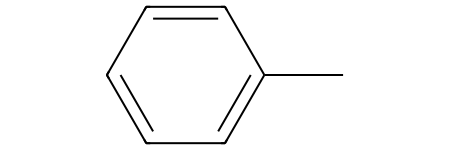

In [6]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m   # 그림을 그려준다

In [7]:
type(m)

rdkit.Chem.rdchem.Mol

## mol 파일 읽기

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   9285      0 --:--:-- --:--:-- --:--:--  9285


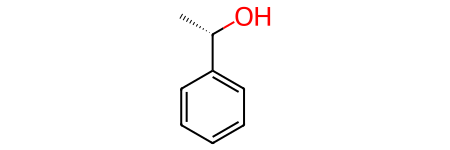

In [8]:
!curl https://raw.githubusercontent.com/rdkit/rdkit-orig/master/Docs/Book/data/chiral.mol -o chiral.mol
m = Chem.MolFromMolFile('chiral.mol')
m

In [9]:
# SMILE로 변환하기
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

In [10]:
# mol 파일 보기
!cat chiral.mol


  Marvin  08160807402D          

  9  9  0  0  1  0            999 V2000
    0.0000    2.4750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    2.0625    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.4289    2.4750    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  6  0  0  0
  2  4  1  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
  6  7  4  0  0  0  0
  7  8  4  0  0  0  0
  8  9  4  0  0  0  0
  4  9  4  0  0  0  0
M  END


In [11]:
print(m.GetNumAtoms(), m.GetNumBonds())

9 9


In [1]:
# dir(m)

## SDF (Structure Data File) 파일 읽기

- 다수의 mol 정보를 저장하는 파일 형식


In [12]:
!curl https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf -o a.sdf
!head -40 a.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9578  100  9578    0     0   492k      0 --:--:-- --:--:-- --:--:--  492k
mol-295
XXCombChem04050707333D                 0.00000

 22 24  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0 

In [13]:
suppl = Chem.SDMolSupplier('a.sdf')
suppl

In [14]:
for mol in suppl:
  print(mol.GetNumAtoms(), mol.GetNumBonds())

20 22
24 26
24 27
26 29


## diversity of SMILES forms
- needs canonical SMILES

In [15]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


## mol 파일로 저장

In [16]:
m2 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m2),file=open('foo.mol','w+'))

In [17]:
!cat foo.mol


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



## mol 객체 사용하기

6
8
6


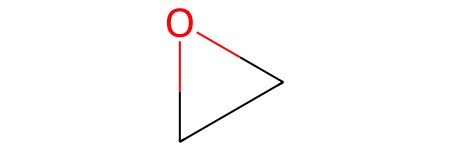

In [18]:
# Looping over Atoms and Bonds
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
  print(atom.GetAtomicNum())

m

In [19]:
# 첫번째 인덱스
print(m.GetBonds()[0].GetBondType())
print(m.GetAtomWithIdx(0).GetSymbol())
print(m.GetAtomWithIdx(0).GetExplicitValence())

SINGLE
C
2


In [20]:
# 두번째 인덱스
print(m.GetBonds()[1].GetBondType())
print(m.GetAtomWithIdx(1).GetSymbol())
print(m.GetAtomWithIdx(1).GetExplicitValence())

SINGLE
O
2


False
True


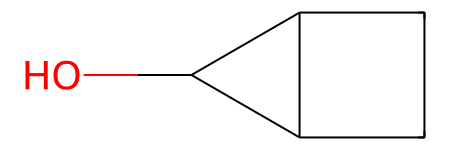

In [21]:
# Ring info
m = Chem.MolFromSmiles('OC1C2C1CC2')
print(m.GetAtomWithIdx(0).IsInRing())
print(m.GetAtomWithIdx(1).IsInRing())

m

In [22]:
# smallest set of smallest rings (SSSR)
ssr = Chem.GetSymmSSSR(m)
print(len(ssr))
print(list(ssr[0]))
print(list(ssr[1]))

2
[1, 2, 3]
[4, 5, 2, 3]


# 이미지 그리기


In [24]:
!curl -o cdk2.sdf https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf

with Chem.SDMolSupplier('cdk2.sdf') as suppl:
  ms = [x for x in suppl if x is not None]

print(len(ms), 'mols')
# for m in ms: 
#   tmp=AllChem.Compute2DCoords(m)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156k  100  156k    0     0  6255k      0 --:--:-- --:--:-- --:--:-- 6255k
47 mols


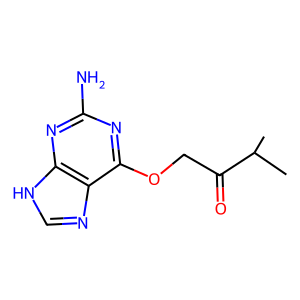

In [25]:
img1 = Draw.MolToImage(ms[0],subImgSize=(300,300),returnPNG=False)
img1

## 이미지 파일로 저장

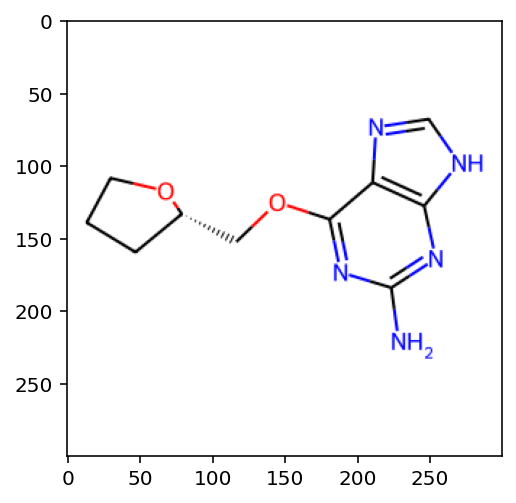

In [26]:
Draw.MolToFile(ms[1],'cdk2_mol1.o.png')    
plt.imshow(mpimg.imread('cdk2_mol1.o.png'))

## 그리드 형태로 이미지 그리기

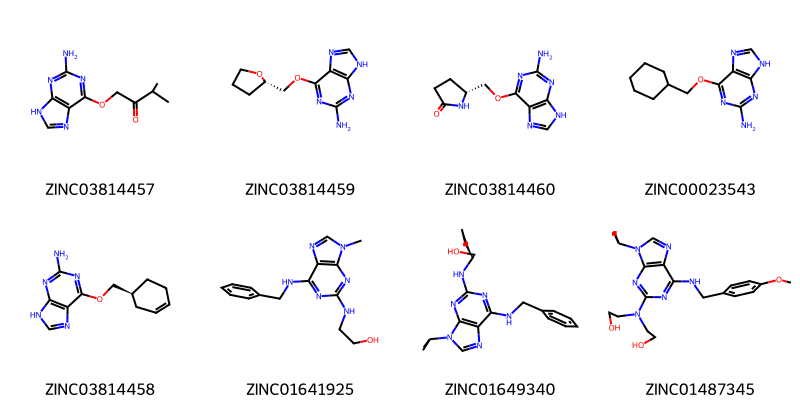

In [27]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,
    subImgSize=(200,200),returnPNG=False,
    legends=[x.GetProp("_Name") for x in ms[:8]])    

img
# img.save('cdk2_molgrid.o.png')    

In [28]:
type(img)

IPython.core.display.SVG